In [9]:
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential, load_model

In [24]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

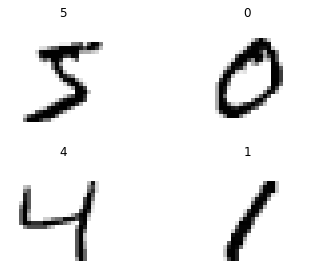

In [31]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

for axes, image, target in zip(axes.ravel(), train_images, train_labels):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_title(target)
    axes.axis('off')

plt.tight_layout()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Building model

In [6]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x=train_images, y=train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.3936 - accuracy: 0.8890
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1114 - accuracy: 0.9662
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0683 - accuracy: 0.9799
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0485 - accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0350 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0202 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0170 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0090

In [27]:
model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0773 - accuracy: 0.9804


[0.07731213420629501, 0.980400025844574]

In [28]:
model.save('models/digits_classifier.h5')

In [10]:
model = load_model('models/digits_classifier.h5')

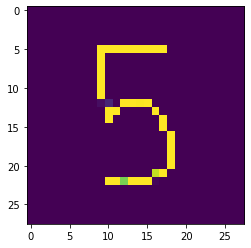

In [19]:
image_5 = 255 - cv2.imread('images/5.png', 0)
image_5 = cv2.resize(image_5, (28, 28))

plt.imshow(image_5)
plt.show()

In [20]:
image_5 = image_5.reshape((1, 28 * 28))
image_5 = image_5.astype('float32') / 255

In [21]:
result = model.predict(image_5)

In [22]:
print(f'Prediction result: {result.argmax()}')

Prediction result: 5
